# Лабораторная работа 4
## Вариант 14
### Котов Иван, РИМ-181226

1) Сначала импортируйте в свой код нужные библиотеки, функции и т.д.

In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
%matplotlib inline
np.random.seed(42)
import  warnings
warnings.simplefilter('ignore')

2. Для начала попробуем создать собственные АРПСС ряды первого и
второго порядков и изучить их автокорреляционные функции.
3. Создадим два АР(1) процесса первого порядка

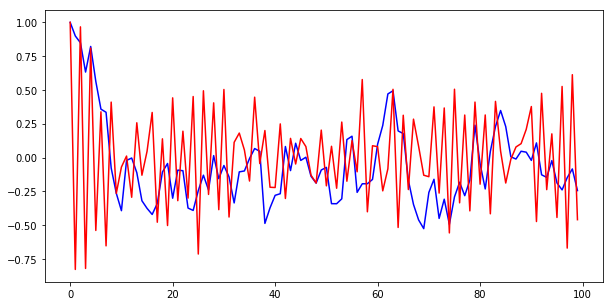

In [3]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
    z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
    z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b')
plt.plot(z2, 'r')
plt.show()

4. Постройте для этих рядов функции автокорреляции с помощью функции plot_acf:

<Figure size 720x360 with 0 Axes>

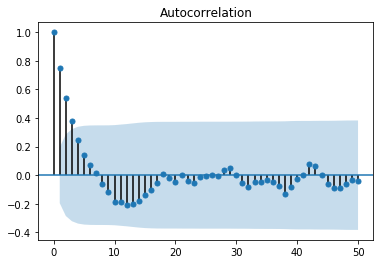

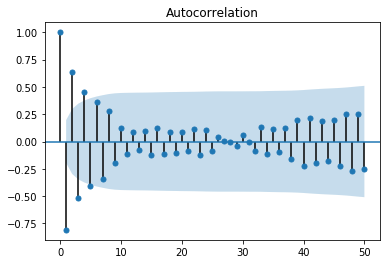

In [4]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

5. Сравните эти графики между собой: найдите их сходства и различия, а также характерные особенности, которые позволяют отнести их к модели АР первого порядка.

#### На первом графике функция почти монотонно переходит из положительной области в отрицательную, в то время как функция на втором графике является знакопеременной

#### Однако видно, что на обоих графиках значения по модулю сперва монотонно уменьшаеются, а затем попеременно возрастают и убывают

6. Оцените весовой параметр этих процессов (как если бы Вы не знали о
них) на основе функции автокорреляции.
Также удостоверьтесь, что для модели АР(1) коэффициенты
автокорреляции изменяются по степенному закону 

In [5]:
corr_z1=acf(z1, nlags=50)
corr_z2=acf(z2, nlags=50)

In [6]:
phi_z1=corr_z1[1]
phi_z2=corr_z2[1]
phi_z1, phi_z2

(0.7493572041348335, -0.8092476028303485)

Для моделей АР(1) коэффициенты автокорреляции изменяются по степенному закону 

In [7]:
print('Z1')
for i in range(8):
    print('rho_', i, '  ', corr_z1[i], '\tphi^', i, '   ', phi_z1**i)
    
    
print('\n\nZ2')
for i in range(8):
    print('rho_', i, '  ', corr_z2[i], '\tphi^', i, '   ', phi_z2**i)

Z1
rho_ 0    1.0 	phi^ 0     1.0
rho_ 1    0.7493572041348335 	phi^ 1     0.7493572041348335
rho_ 2    0.5376475219755781 	phi^ 2     0.5615362193887746
rho_ 3    0.37785656522737215 	phi^ 3     0.4207912113816166
rho_ 4    0.24592361346375485 	phi^ 4     0.31532292568543796
rho_ 5    0.14440158212559878 	phi^ 5     0.23628950599125567
rho_ 6    0.07082285417368364 	phi^ 6     0.17706524357600836
rho_ 7    0.012147420977949696 	phi^ 7     0.1326851158755709


Z2
rho_ 0    1.0 	phi^ 0     1.0
rho_ 1    -0.8092476028303485 	phi^ 1     -0.8092476028303485
rho_ 2    0.6386763859656819 	phi^ 2     0.6548816826866655
rho_ 3    -0.5201826840608065 	phi^ 3     -0.5299614318516889
rho_ 4    0.4572771950705583 	phi^ 4     0.42887001831851834
rho_ 5    -0.40552784483788207 	phi^ 5     -0.3470620342500686
rho_ 6    0.36112989541772367 	phi^ 6     0.28085911925029233
rho_ 7    -0.3418654253040039 	phi^ 7     -0.22728456898634203


7. Аналогичным образом постройте два СС(1) процесса среднего-
скользящего первого порядка


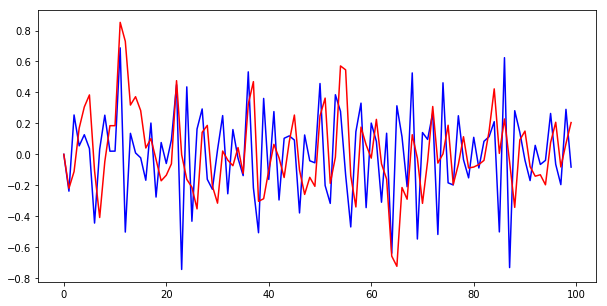

In [8]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
    z3[i] = ar[i] - 0.8 * ar[i - 1]
    z4[i] = ar[i] + 0.8 * ar[i - 1]
plt.figure(figsize = (10, 5))
plt.plot(z3, 'b')
plt.plot(z4, 'r')
plt.show()

8. Постройте для этих рядов функции автокорреляции, достаточно взять
25 лагов (четверть от длины ряда).

<Figure size 720x360 with 0 Axes>

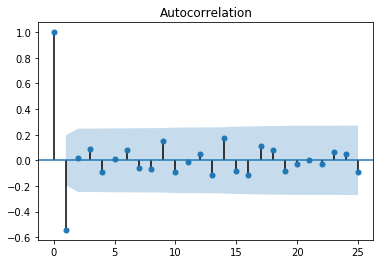

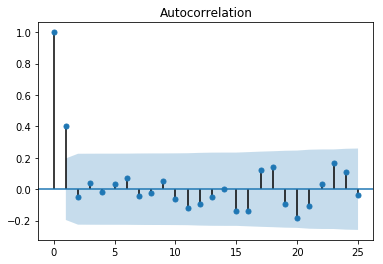

In [9]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=25)
plot_acf(z4, lags=25)
plt.show()

9. Сравните эти графики между собой: найдите их сходства и различия,
а также характерные особенности, которые позволяют отнести их к
модели СС первого порядка.

#### На обоих графиках значение по модулю второго отсчета является наибольшим после первого отсчета

#### Далее функция в большинстве случаев знакопеременная

#### Значения не монотонно возрастают,убывают

10. Оцените весовой параметр этих процессов (как если бы Вы не знали о них) на основе функции автокорреляции

11.　Удостоверьтесь, что для модели СС(1) коэффициенты автокорреляции соответствуют формуле

In [10]:
corr_z3=acf(z3, nlags=25)
corr_z4=acf(z4, nlags=25)

In [93]:
-0.8/(1+0.8**2)

-0.4878048780487805

In [101]:
corr_z3[1]

-0.5435042371165963

12. Наконец, создайте временной ряд процесса АРСС(1, 1)

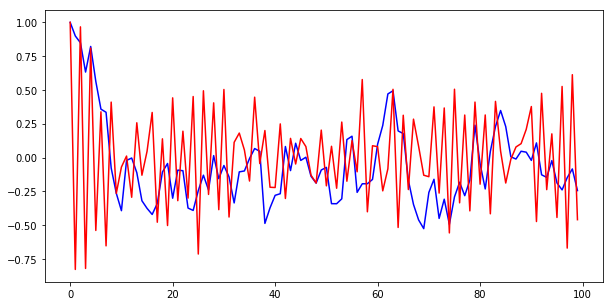

In [11]:
z5 = np.zeros(100)
z6 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
z5[0] = 1
z6[0] = 1
for i in range(1,100):
    z5[i] = 0.8 * z1[i - 1] + ar[i] - 0.3 * ar[i - 1]
    z6[i] = -0.8 * z2[i - 1]+ ar[i] - 0.3 * ar[i - 1]
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b')
plt.plot(z2, 'r')
plt.show()

13. Постройте графики этих рядов и графики их автокорреляционных
функций.

<Figure size 720x360 with 0 Axes>

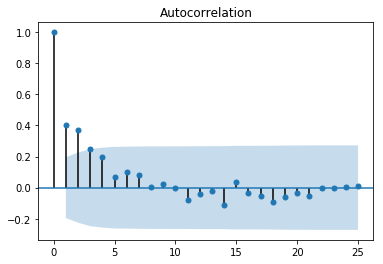

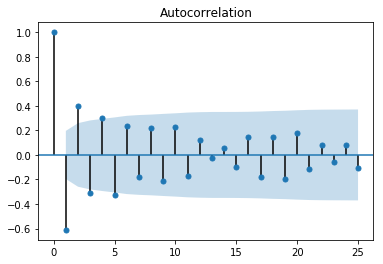

In [13]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=25)
plot_acf(z6, lags=25)
plt.show()

- АКФ первого АPСС не является знакопеременной, т.к. все члены ряда модели имеют оложительный вес.
- АКФ второго АРСС ряда является знакопеременной, т.к один из членов модели имеет отрицательный вес.

14. Есть и другой, более высокоуровневый способ генерации рядов
АРПСС. Используем следующую функцию для создания АРСС (2, 2):

In [14]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

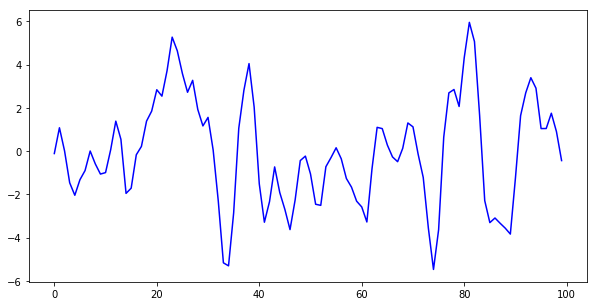

In [15]:
plt.figure(figsize = (10, 5))
plt.plot(y, 'b')
plt.show()

<Figure size 720x360 with 0 Axes>

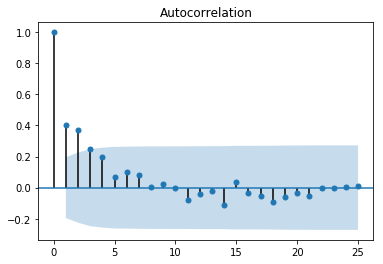

In [16]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=25)
plt.show()

- так как, эта функция не является знакопеременной, можно сказать, что то все члены АРСС модели имеют положительные веса

15. Теперь проведем анализ неизвестного ряда на типовом примере, а затем каждый из студентов проводит анализ собственного ВР по вариантам (номер варианта = последние две цифры студенческого билета).

16. Значения исходного ряда (всего их 24) приведены ниже:

In [17]:
TEST = [0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41,
4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95,
0.45]

17. Постройте график ВР и его автокорреляционную функцию.

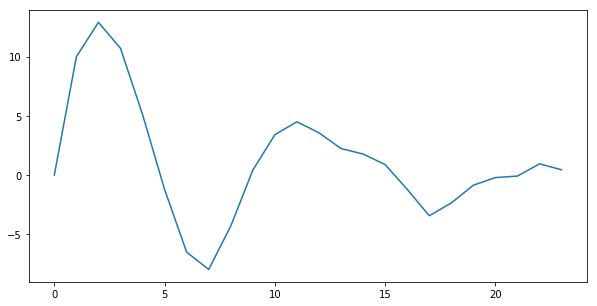

In [18]:
plt.figure(figsize = (10, 5))
plt.plot(TEST)

<Figure size 720x360 with 0 Axes>

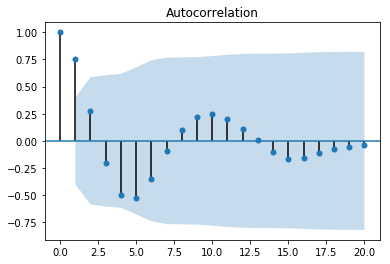

In [19]:
plt.figure(figsize = (10, 5))
plot_acf(TEST, lags=20)
plt.show()

18. По ним можно судить, что ВР, в достаточной степени, стационарен, а, так как, эта функция является знакопеременной, то один из членов АР модели имеет отрицательный вес.

19-21. Создадим три пробные модели АРПСС для проверки ряда на АР(1) = АРПСС(1, 0, 0), АР(2), АР(3), без тренда (trend = ‘nc’):

In [119]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов
arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())
arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Mon, 25 Mar 2019   AIC                            128.850
Time:                        20:09:58   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

21. В этой таблице значения коэффициентов модели авторегрессии
АР(2) написаны в столбце coef. СКВО их расчета – в следующем
столбце.

22. Как по этим таблицам выбрать наилучшую модель? Во-первых, стоит обратить внимание на значение AIC – информационный критерий Акаике, который показывает максимальное правдоподобие модели при штрафовании за избыточные параметры системы. Считается, что наилучшей будет модель с наименьшим значением критерия AIC.


23. Аналогично есть BIC – Байесовский информационный критерий, модификация AIC. Данный критерий налагает больший штраф на увеличение количества параметров по сравнению с AIC.

24. Аналогично есть HQIC –информационный критерий Ханнана-Куинна (Hannan-Quinn), который асимптотически более точный метод чем BIC для дискретных параметров.

25. В любом случае, лучшей моделью будет та, что имеет наименьшее значение информационного критерия среди множества других. Рекомендуется, в первую очередь, выбирать по критерию BIC, так как он сильнее штрафует за переобучение модели и увеличение числа параметров по сравнению с другими. В нашем случае для тестового ВР, для любых информационных критериев, это модель АР(2).
26. Другим методом выбора модели может служить построение моделей АРПСС выбранного порядка и с найденными коэффициентам на графиках совмещенно.
plt.plot(model_fit.fittedvalues)
27. Например, для приведенного примера: 
Модель АР(1) совсем слабо подходит к ВР, АР(2) и АР(3) близки, АР(3) почти не отличается от АР(2), но избыточен по числе параметров (3>2), а значит АР(2) является наиболее оптимальной моделью ВР.

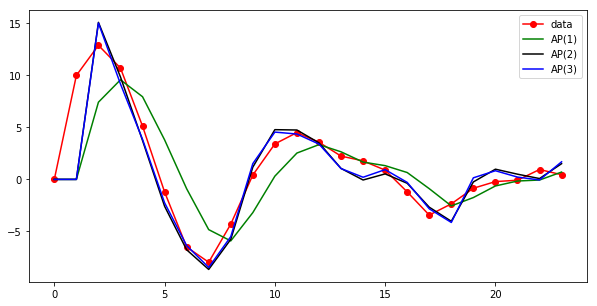

In [21]:
plt.figure(figsize = (10, 5))
plt.plot(TEST, color='red', marker='o', label='data',)
plt.plot(model_fit1.fittedvalues, 'green', label='AP(1)')
plt.plot(model_fit2.fittedvalues, 'black', label='AP(2)')
plt.plot(model_fit3.fittedvalues, 'blue', label='AP(3)')
plt.legend()

28. Теперь попробуйте найти весовые коэффициенты для АР
моделей только 1 и 2 порядка самостоятельно. Для этого Вам
потребуется построить автокорреляционную функцию этого ряда.

In [49]:
corr_model_fit1=acf(TEST, nlags=20)
corr_model_fit2=acf(TEST, nlags=20)

29. Для нахождения весового коэффициента АР(1) используйте
следующую формулу:
    
    $\phi=\rho_1$,
    
где $\rho_1=r(1)$ r оценка автокорреляционной функции.

In [50]:
phi_model_fit1=corr_model_fit1[1]
print('model_fit1 phi=', phi_model_fit1)

model_fit1 phi= 0.7550097626743364


30. Для АР(2) используйте следующие формулы аналогичным
образом:


\begin{equation*}
\phi_1=\frac {\rho_1 * (1-\rho_2)} {1-\rho_1^2}, \\
\phi_2=\frac {\rho_2 - \rho_1^2}{1-\rho_1^2}
\end{equation*}

In [51]:
rho1=corr_model_fit2[1]
rho2=corr_model_fit2[2]
phi1_model_fit2=(rho1*(1-rho2))/(1-rho1**2)
phi2_model_fit2=(rho2-rho1**2)/(1-rho1**2)

print('model_fit2 phi1=', phi1_model_fit2)
print('model_fit2 phi2=', phi2_model_fit2)


model_fit2 phi1= 1.2777374692491614
model_fit2 phi2= -0.6923456257350368


31. Убедитесь, что полученные веса будут близки к тем, что были
получены с помощью функций Python.
32. Теперь в зависимости от своего варианта, который определяется
по последним двум цифрам студ. билета, выберите из выданных
преподавателей mat-файлов тот, который имеет номер Вашего
варианта и загрузите из него временной ряд Z, например:

In [41]:
file = h5py.File('4_14.mat', 'r')
data = file.get('z14')
Z = np.array(data)

33. Постройте график ВР и его автокорреляционную функцию.

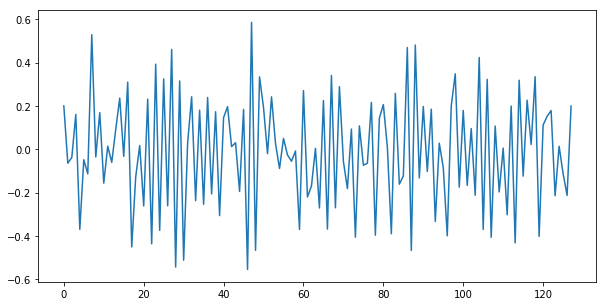

In [42]:
plt.figure(figsize = (10, 5))
plt.plot(Z)

<Figure size 720x360 with 0 Axes>

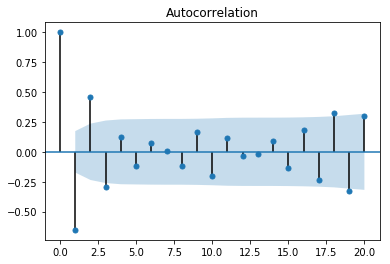

In [43]:
plt.figure(figsize = (10, 5))
plot_acf(Z, lags=20)
plt.show()

34. Оцените порядок АРСС модели с помощью класса ARIMA. Для упрощения задачи выбора модели используйте только чистые АР или СС модели, то есть класс ARIMA c order = (p, 0, 0) или order = (0, 0, q).

In [118]:
arima1 = ARIMA(Z, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов
arima2 = ARIMA(Z, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())
arima3 = ARIMA(Z, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                  25.241
Method:                       css-mle   S.D. of innovations              0.198
Date:                Mon, 25 Mar 2019   AIC                            -46.481
Time:                        20:09:45   BIC                            -40.777
Sample:                             0   HQIC                           -44.164
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6509      0.067     -9.772      0.000      -0.781      -0.520
                                    Roots                                    
                  Real          Imaginary           M

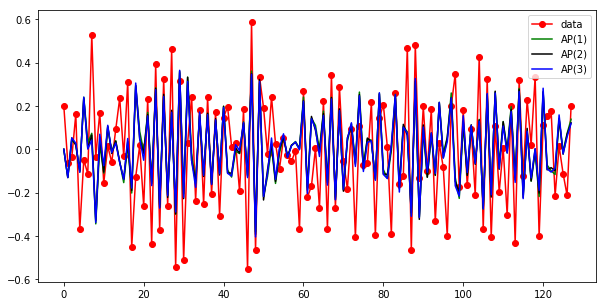

In [46]:
plt.figure(figsize = (10, 5))
plt.plot(Z, color='red', marker='o', label='data',)
plt.plot(model_fit1.fittedvalues, 'green', label='AP(1)')
plt.plot(model_fit2.fittedvalues, 'black', label='AP(2)')
plt.plot(model_fit3.fittedvalues, 'blue', label='AP(3)')
plt.legend()

In [116]:
arima1 = ARIMA(Z, order = (0, 0, 1)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов
arima2 = ARIMA(Z, order = (0, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())
arima3 = ARIMA(Z, order = (0, 0, 3))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(0, 1)   Log Likelihood                  13.775
Method:                       css-mle   S.D. of innovations              0.217
Date:                Mon, 25 Mar 2019   AIC                            -23.550
Time:                        20:09:25   BIC                            -17.846
Sample:                             0   HQIC                           -21.232
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y       -0.5296      0.067     -7.951      0.000      -0.660      -0.399
                                    Roots                                    
                  Real          Imaginary           M

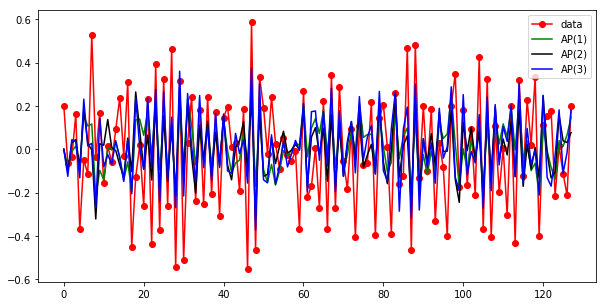

In [117]:
plt.figure(figsize = (10, 5))
plt.plot(Z, color='red', marker='o', label='data',)
plt.plot(model_fit1.fittedvalues, 'green', label='AP(1)')
plt.plot(model_fit2.fittedvalues, 'black', label='AP(2)')
plt.plot(model_fit3.fittedvalues, 'blue', label='AP(3)')
plt.legend()

35. Выберите модель с наиболее подходящей структурой и вычислите для нее коэффициенты. Предоставьте их для проверки Вашему преподавателю с пояснениями в выборе модели.

In [127]:
arima1 = ARIMA(Z, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                  25.241
Method:                       css-mle   S.D. of innovations              0.198
Date:                Mon, 25 Mar 2019   AIC                            -46.481
Time:                        20:31:43   BIC                            -40.777
Sample:                             0   HQIC                           -44.164
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6509      0.067     -9.772      0.000      -0.781      -0.520
                                    Roots                                    
                  Real          Imaginary           M

36. В дальнейшем попробуйте подобрать такую модель АРПСС (ARIMA) со всевозможными параметрами order = (p, d, q), которая будет наилучшей для данного ВР среди всех других по одному из информационных критериев.

In [84]:
from itertools import combinations
x = [0,1,2,3,0,1,2,3,0,1,2,3]
all_params = sorted(set(list(combinations(x, 3))))

In [124]:
for p1,p2,p3 in all_params:
    try:
        arima = ARIMA(Z, order = (p1, p2, p3)) # создаем модель
        model_fit = arima.fit(disp = False, trend='nc') # подгоняем под ВР
        print('order(',p1,',',p2,',',p3,'): BIC = ',' ',model_fit.bic) # выводим таблицу результатов
    except ValueError:
        continue    

order( 0 , 0 , 1 ): BIC =    -17.84599456957008
order( 0 , 0 , 2 ): BIC =    -25.845397501760242
order( 0 , 0 , 3 ): BIC =    -36.11921320218602
order( 0 , 1 , 1 ): BIC =    35.28185150938333
order( 0 , 2 , 1 ): BIC =    186.3937177359606
order( 1 , 0 , 0 ): BIC =    -40.77714614229794
order( 1 , 0 , 1 ): BIC =    -36.39567542251801
order( 1 , 0 , 2 ): BIC =    -32.70503540731232
order( 1 , 0 , 3 ): BIC =    -31.440478807170802
order( 1 , 1 , 0 ): BIC =    29.496446771596997
order( 1 , 1 , 1 ): BIC =    -29.98015166531308
order( 1 , 1 , 2 ): BIC =    -25.575716344936033
order( 1 , 1 , 3 ): BIC =    -21.890068756660064
order( 1 , 2 , 0 ): BIC =    156.53090683178814
order( 1 , 2 , 2 ): BIC =    -11.5477174421172
order( 2 , 0 , 0 ): BIC =    -36.496771791393186
order( 2 , 0 , 1 ): BIC =    -31.735874146938098
order( 2 , 0 , 2 ): BIC =    -28.313422592565825
order( 2 , 0 , 3 ): BIC =    -26.83562842158417
order( 2 , 1 , 0 ): BIC =    5.350601986673103
order( 2 , 1 , 1 ): BIC =    -25.6705

In [120]:
arima = ARIMA(Z, order = (1, 0, 0)) # создаем модель
model_fit = arima.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit.summary()) # выводим таблицу результатов

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                  25.241
Method:                       css-mle   S.D. of innovations              0.198
Date:                Mon, 25 Mar 2019   AIC                            -46.481
Time:                        20:24:32   BIC                            -40.777
Sample:                             0   HQIC                           -44.164
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6509      0.067     -9.772      0.000      -0.781      -0.520
                                    Roots                                    
                  Real          Imaginary           M

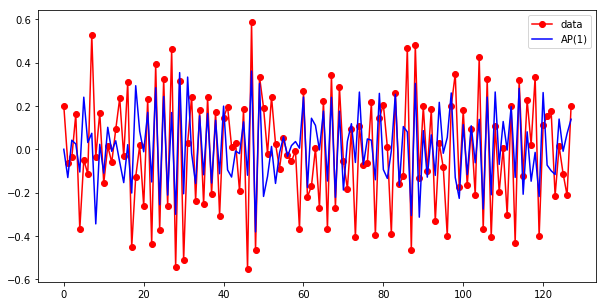

In [122]:
plt.figure(figsize = (10, 5))
plt.plot(Z, color='red', marker='o', label='data',)
plt.plot(model_fit.fittedvalues, 'blue', label='AP(1)')
plt.legend()

## По BIC лучшей моделью является ARIMA с order = (1, 0, 0) (BIC = -40.777) с коэффициентом -0.6509